In [2]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [3]:
run_id = 'Algorithm1_apple_etc'

In [4]:
os.mkdir(run_id)

In [5]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [113]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [114]:
predict = DataLoader('F', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [115]:
predict_req, real = data_prep(predict, 20, 5) # dividing data into predictor input and real data

### Individual predictor forecasts

In [116]:
individual_predictors_forecasts = individual_predictors_pretrained_Ford_5_5(predict_req, 5)

### System disagreement between individual predictor forecasts

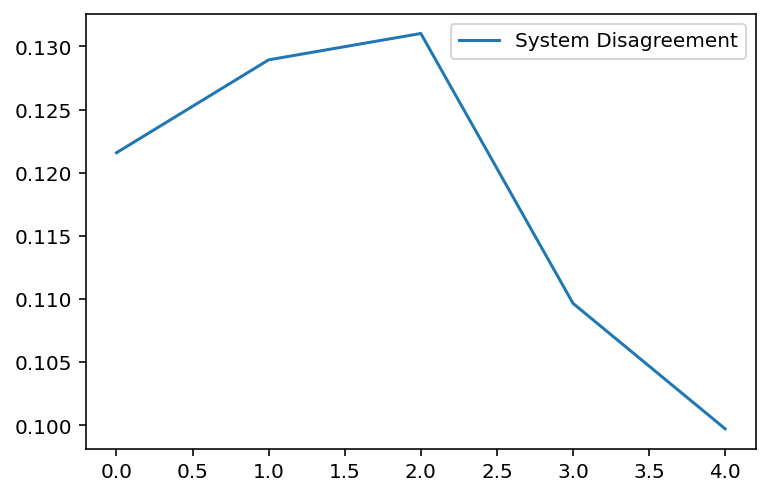

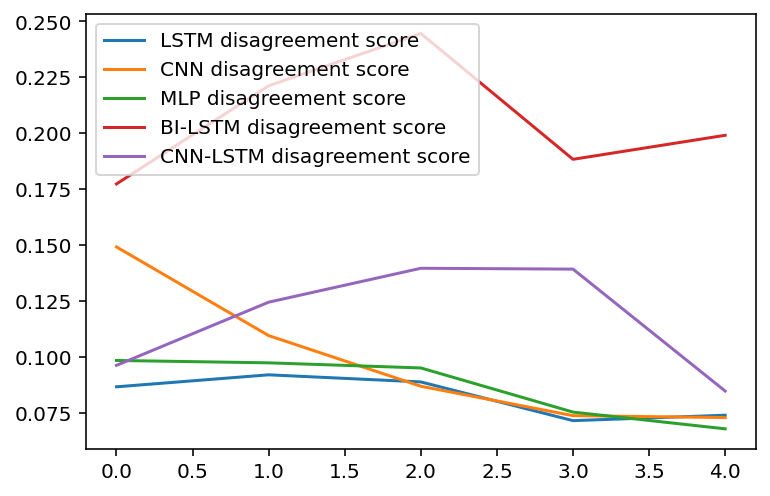

In [117]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [118]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [119]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [120]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Real Value,LSTM,CNN,MLP,BI-LSTM,CNN-LSTM,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score
Date,,,,,,,,,,,,,,,,,
2018-03-02,9.124233,9.124233,9.124233,9.124233,9.236832,9.166625,9.137268,9.273428,9.078369,8.946896,9.185206,0.121584,0.086674,0.149195,0.098454,0.177338,0.096262
2018-03-05,9.103209,9.122990,9.113100,9.227708,9.110236,9.325278,9.115152,9.202824,9.088354,8.882010,9.227708,0.128939,0.092034,0.109568,0.097393,0.221200,0.124498
2018-03-06,9.160300,9.177546,9.174024,9.299949,9.207084,9.369350,9.215300,9.205691,9.164831,8.915730,9.299949,0.131025,0.088859,0.086937,0.095109,0.244570,0.139648
2018-03-07,9.127596,9.143509,9.139649,9.266868,9.157837,9.369350,9.141284,9.130195,9.160379,8.939255,9.266868,0.109666,0.071560,0.073777,0.075379,0.188341,0.139272
2018-03-08,9.144579,9.155108,9.155880,9.229356,9.172449,9.351720,9.153999,9.209634,9.184406,8.945501,9.229356,0.099735,0.073979,0.072943,0.067898,0.199078,0.084776


In [14]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [121]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,CNN-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score,System Disagreement
Date,,,,,,,,,,,,,,,,
2018-03-02,0.029357,0.106803,0.088256,0.219729,0.018581,0.042392,0.042392,0.042392,0.042392,0.070207,0.086674,0.149195,0.098454,0.177338,0.096262,0.121584
2018-03-05,0.210126,0.122455,0.236924,0.443269,0.097570,0.222069,0.202288,0.212178,0.097570,0.215043,0.092034,0.109568,0.097393,0.221200,0.124498,0.128939
2018-03-06,0.154051,0.163659,0.204519,0.453620,0.069402,0.209050,0.191804,0.195327,0.069402,0.162266,0.088859,0.086937,0.095109,0.244570,0.139648,0.131025
2018-03-07,0.228066,0.239156,0.208971,0.430096,0.102483,0.241754,0.225842,0.229701,0.102483,0.211513,0.071560,0.073777,0.075379,0.188341,0.139272,0.109666
2018-03-08,0.197721,0.142086,0.167314,0.406219,0.122364,0.207141,0.196612,0.195840,0.122364,0.179271,0.073979,0.072943,0.067898,0.199078,0.084776,0.099735


In [16]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,MLP absolute error,BI-LSTM absolute error,CNN-LSTM absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,BI-LSTM disagreement score,CNN-LSTM disagreement score,System Disagreement
LSTM absolute error,1.000000,0.595504,0.877624,0.896488,0.936677,0.971185,0.974905,0.975711,0.885906,0.986562,-0.397278,-0.844938,-0.557912,0.326371,0.403948,-0.295980
CNN absolute error,0.595504,1.000000,0.452054,0.506859,0.437693,0.621259,0.634108,0.620233,0.386779,0.546420,-0.663110,-0.703305,-0.528566,-0.031565,0.622478,-0.320785
MLP absolute error,0.877624,0.452054,1.000000,0.946379,0.699353,0.923931,0.906996,0.926136,0.592961,0.932892,0.049911,-0.637876,-0.108330,0.647863,0.679886,0.197054
BI-LSTM absolute error,0.896488,0.506859,0.946379,1.000000,0.787087,0.971139,0.962837,0.967395,0.678492,0.906929,-0.104671,-0.819551,-0.300456,0.699964,0.587181,0.032965
CNN-LSTM absolute error,0.936677,0.437693,0.699353,0.787087,1.000000,0.876877,0.891035,0.880244,0.987058,0.882931,-0.514606,-0.861957,-0.734255,0.214058,0.074625,-0.528591
Average absolute error,0.971185,0.621259,0.923931,0.971139,0.876877,1.000000,0.999060,0.999725,0.793454,0.963524,-0.301657,-0.879141,-0.466953,0.509421,0.533554,-0.156335
NoMemory absolute error,0.974905,0.634108,0.906996,0.962837,0.891035,0.999060,1.000000,0.998757,0.812083,0.960535,-0.340720,-0.895978,-0.504759,0.482282,0.509400,-0.198123
Memory absolute error,0.975711,0.620233,0.926136,0.967395,0.880244,0.999725,0.998757,1.000000,0.798759,0.969386,-0.303332,-0.872891,-0.467138,0.496737,0.530948,-0.159730
Focus absolute error,0.885906,0.386779,0.592961,0.678492,0.987058,0.793454,0.812083,0.798759,1.000000,0.821268,-0.579116,-0.807906,-0.789711,0.072056,-0.060120,-0.632059
Anchor absolute error,0.986562,0.546420,0.932892,0.906929,0.882931,0.963524,0.960535,0.969386,0.821268,1.000000,-0.261591,-0.762439,-0.419320,0.386981,0.482612,-0.153342


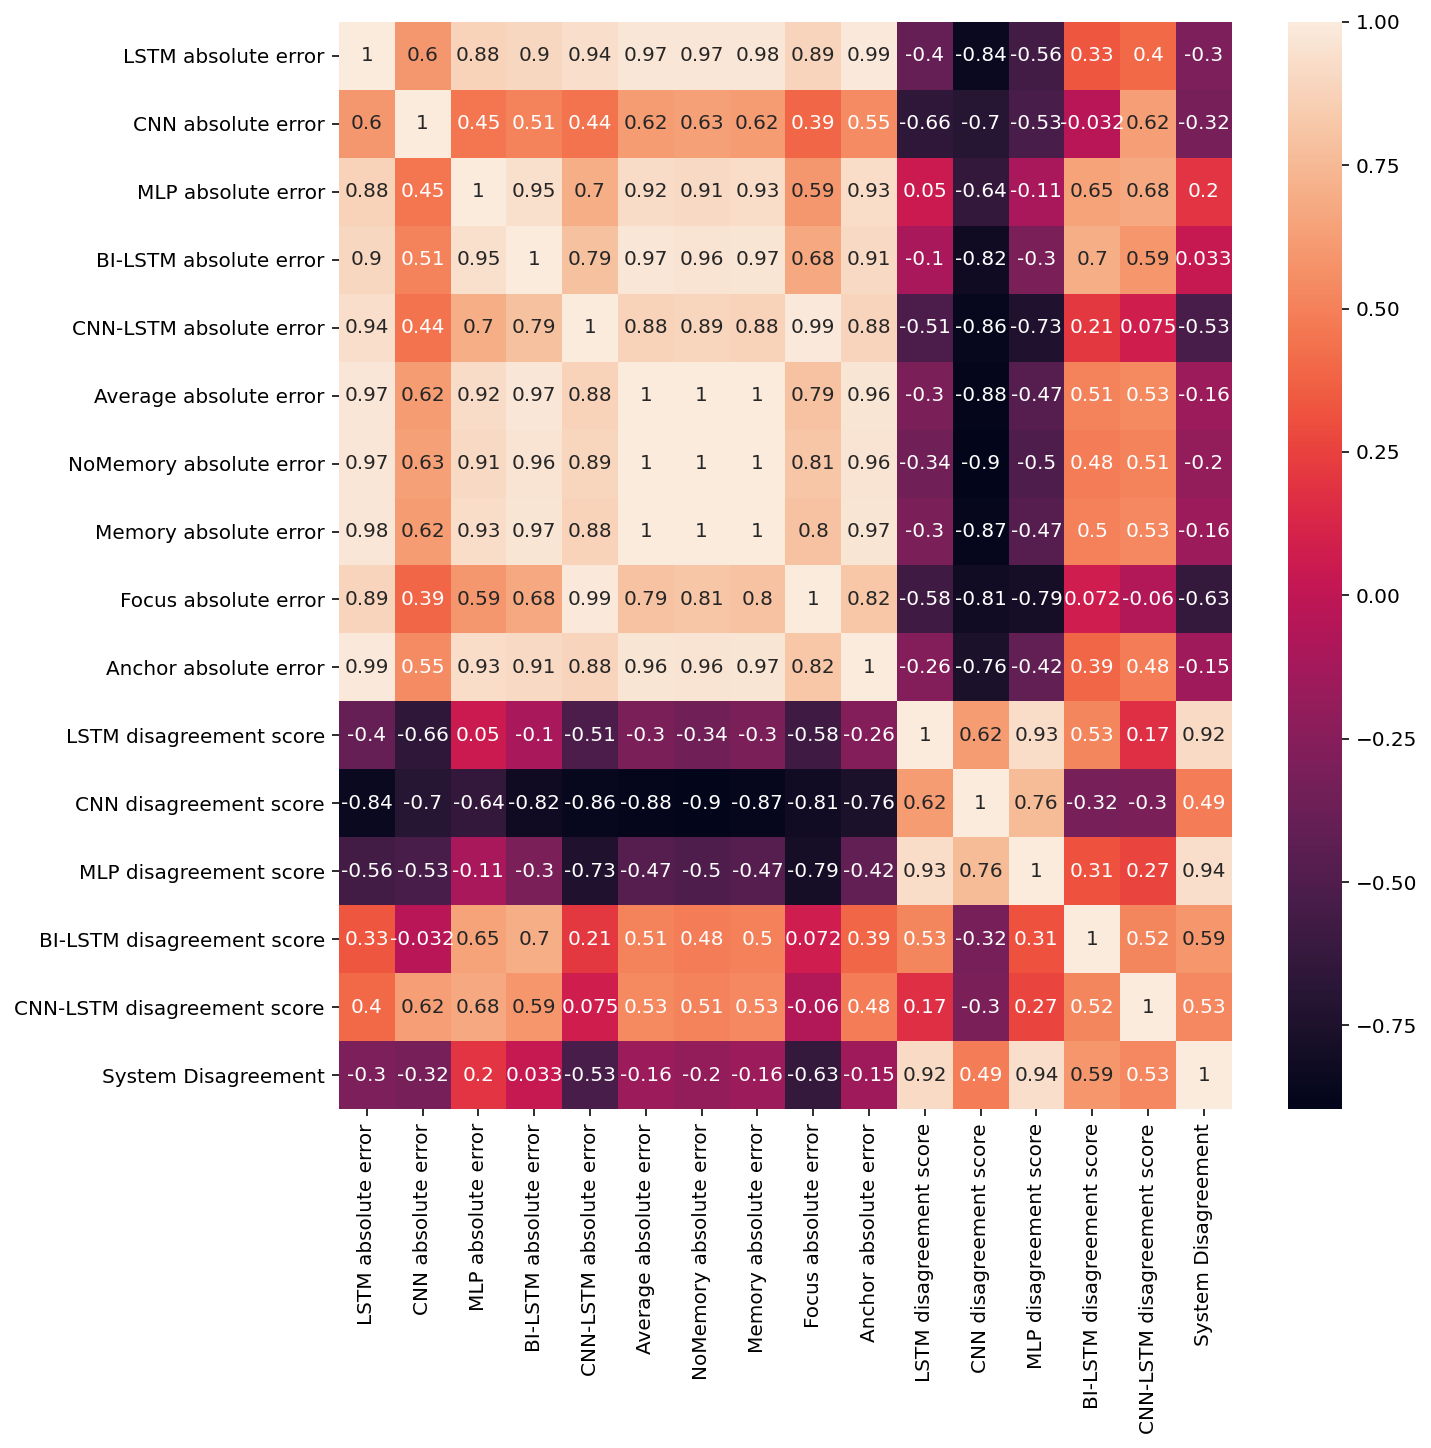

In [122]:
correlation_ = correlation(prediction_error, True)
correlation_

In [20]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MAE, MSE and MSE log scores

,Algorithms,MSE
0,Average,0.039233
1,NoMemory,0.033833
2,Memory,0.035217
3,Focus,0.008322
4,Anchor,0.030876
5,LSTM,0.031971
6,CNN,0.026114
7,MLP,0.035483
8,BI-LSTM,0.160107
9,CNN-LSTM,0.008032


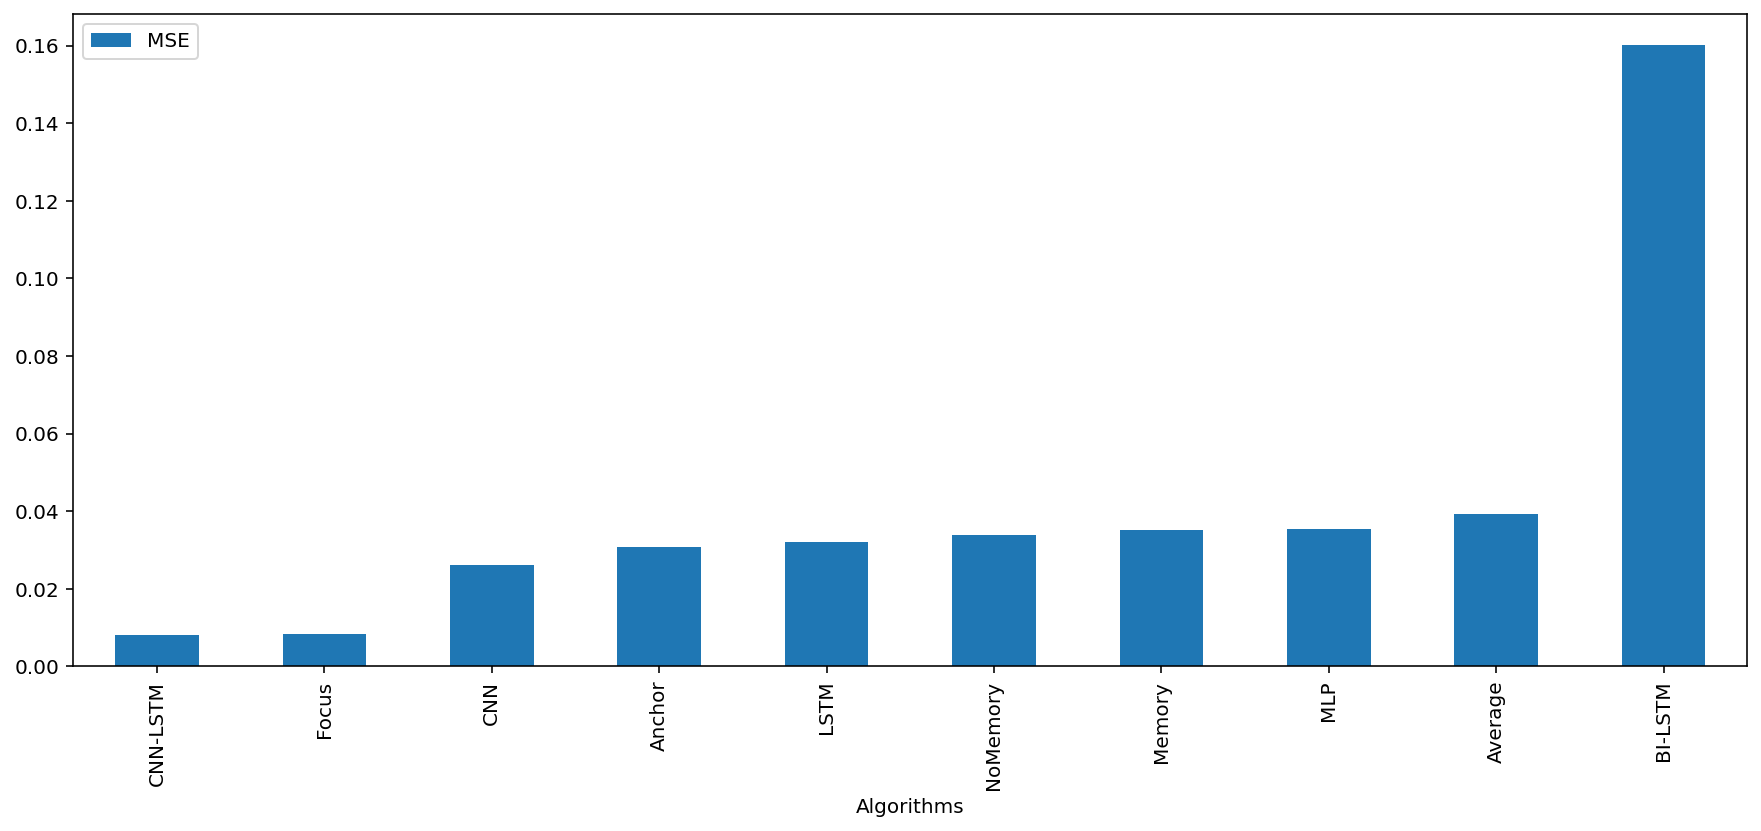

In [123]:
mse = mse_score(all_forecasts, True)
mse

In [22]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.000374
1,NoMemory,0.000322
2,Memory,0.000335
3,Focus,0.000079
4,Anchor,0.000376
5,LSTM,0.000304
6,CNN,0.000248
7,MLP,0.000338
8,BI-LSTM,0.001560
9,CNN-LSTM,0.000076


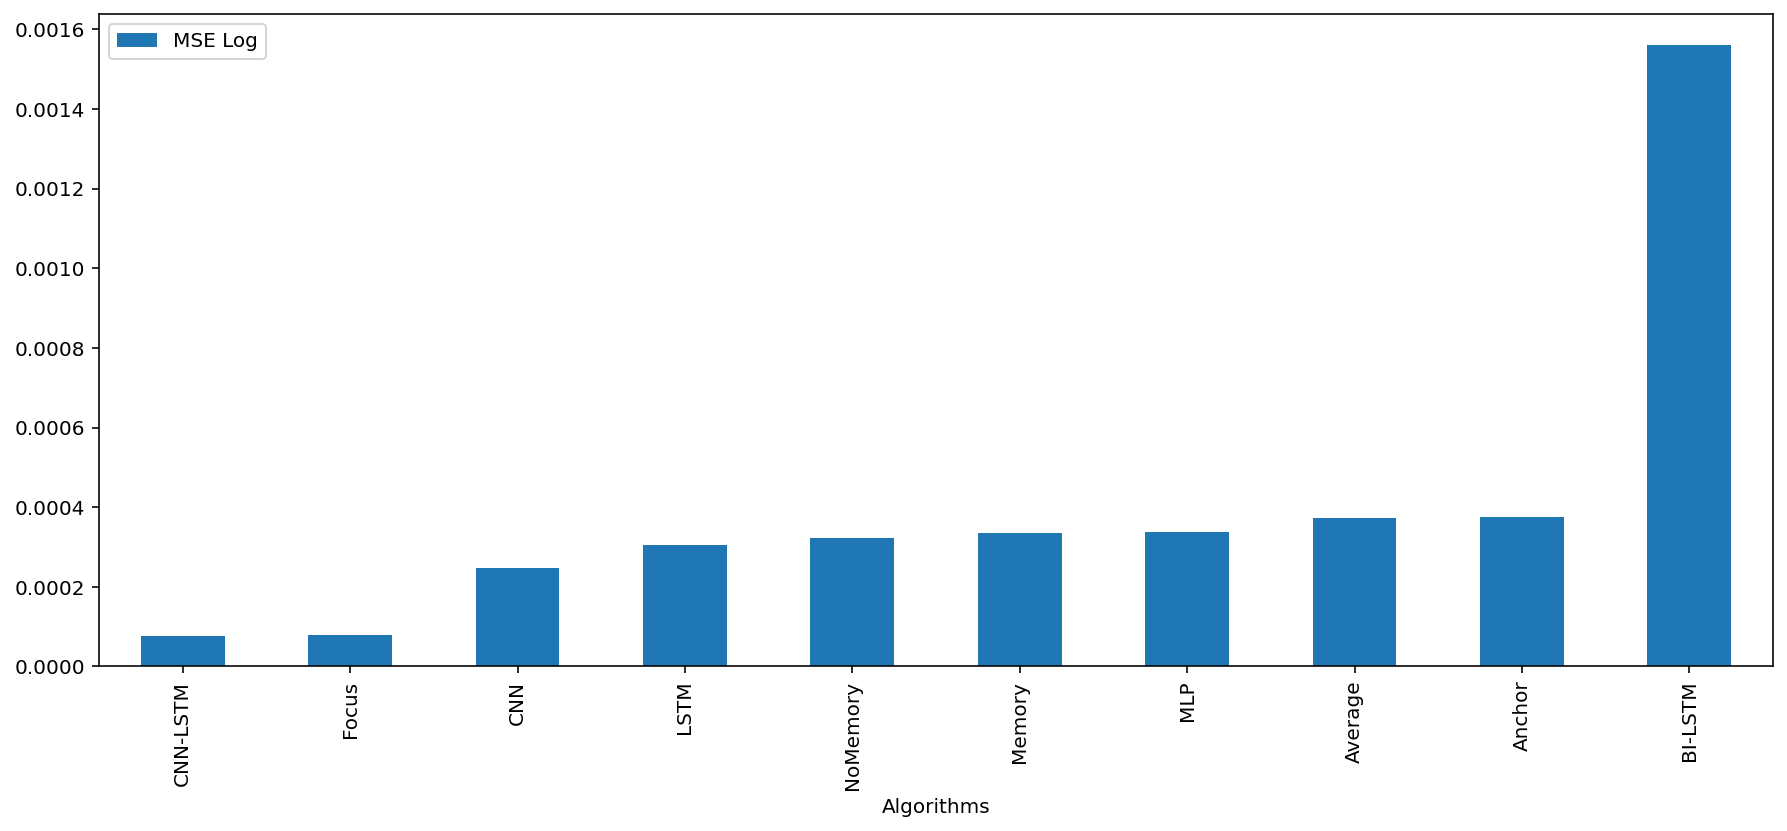

In [111]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [24]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,0.184481
1,NoMemory,0.171788
2,Memory,0.175088
3,Focus,0.086842
4,Anchor,0.197371
5,LSTM,0.163864
6,CNN,0.154832
7,MLP,0.181197
8,BI-LSTM,0.390586
9,CNN-LSTM,0.082080


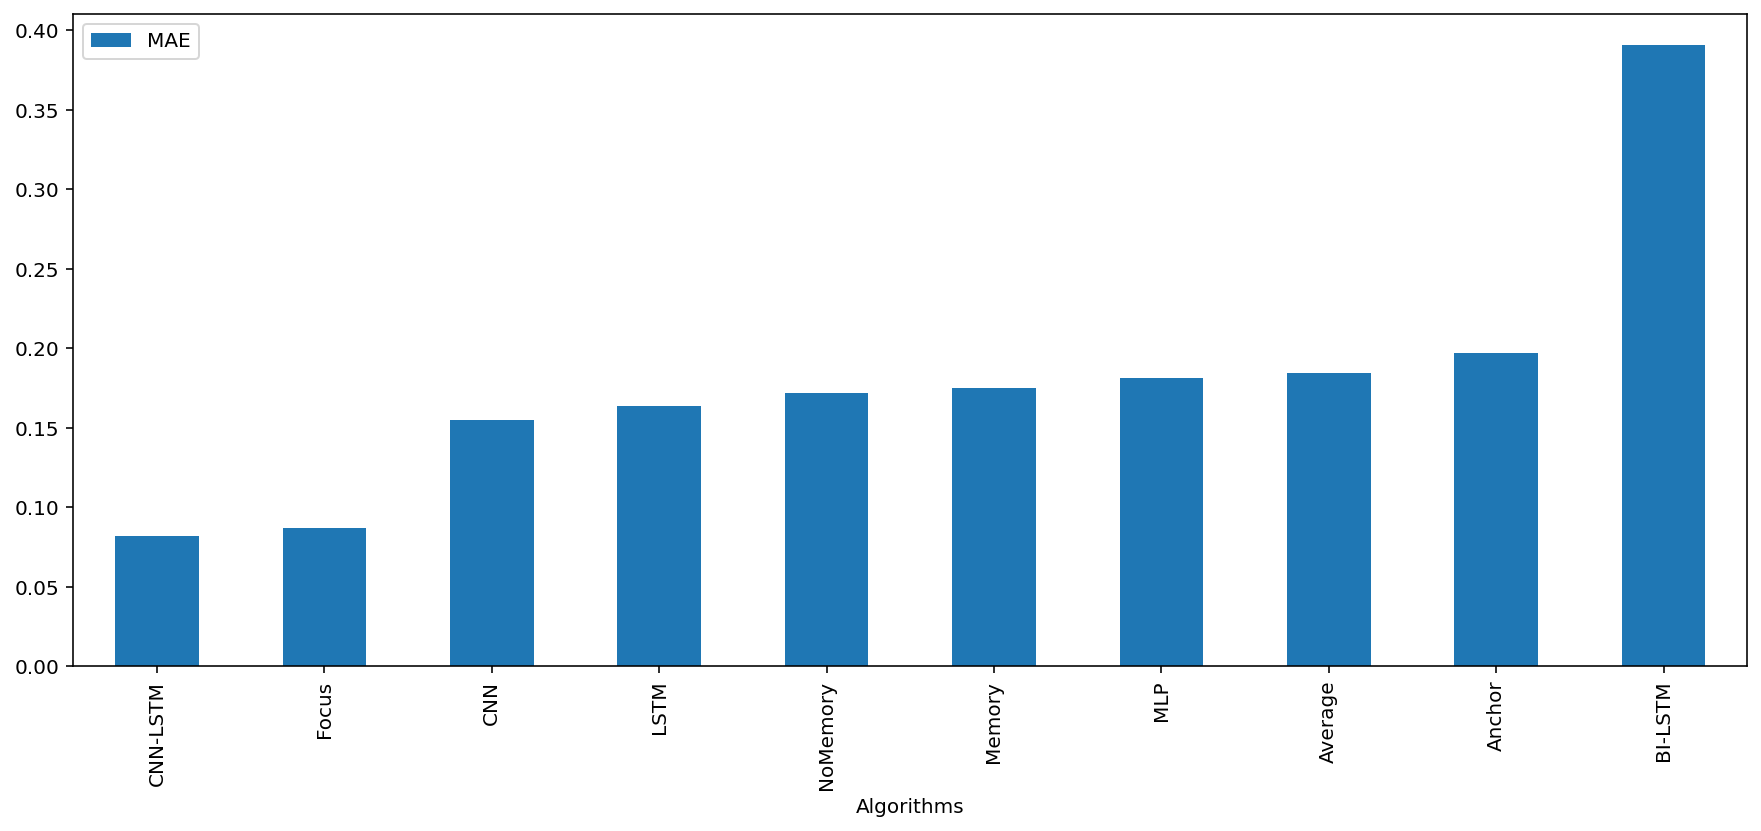

In [112]:
mae = mae_score(all_forecasts, True)
mae

In [26]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

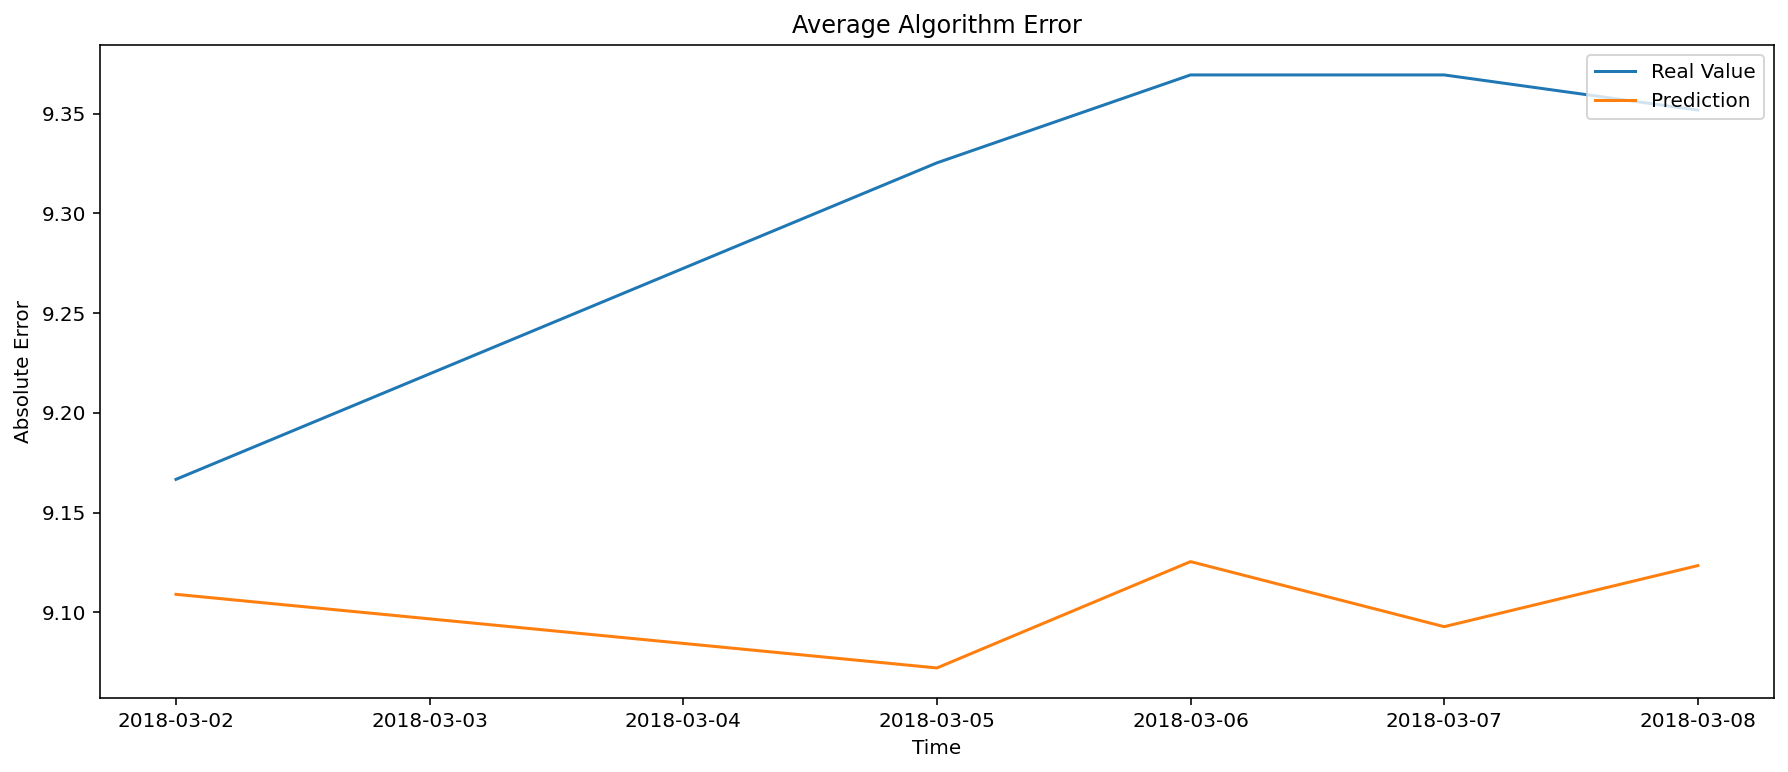

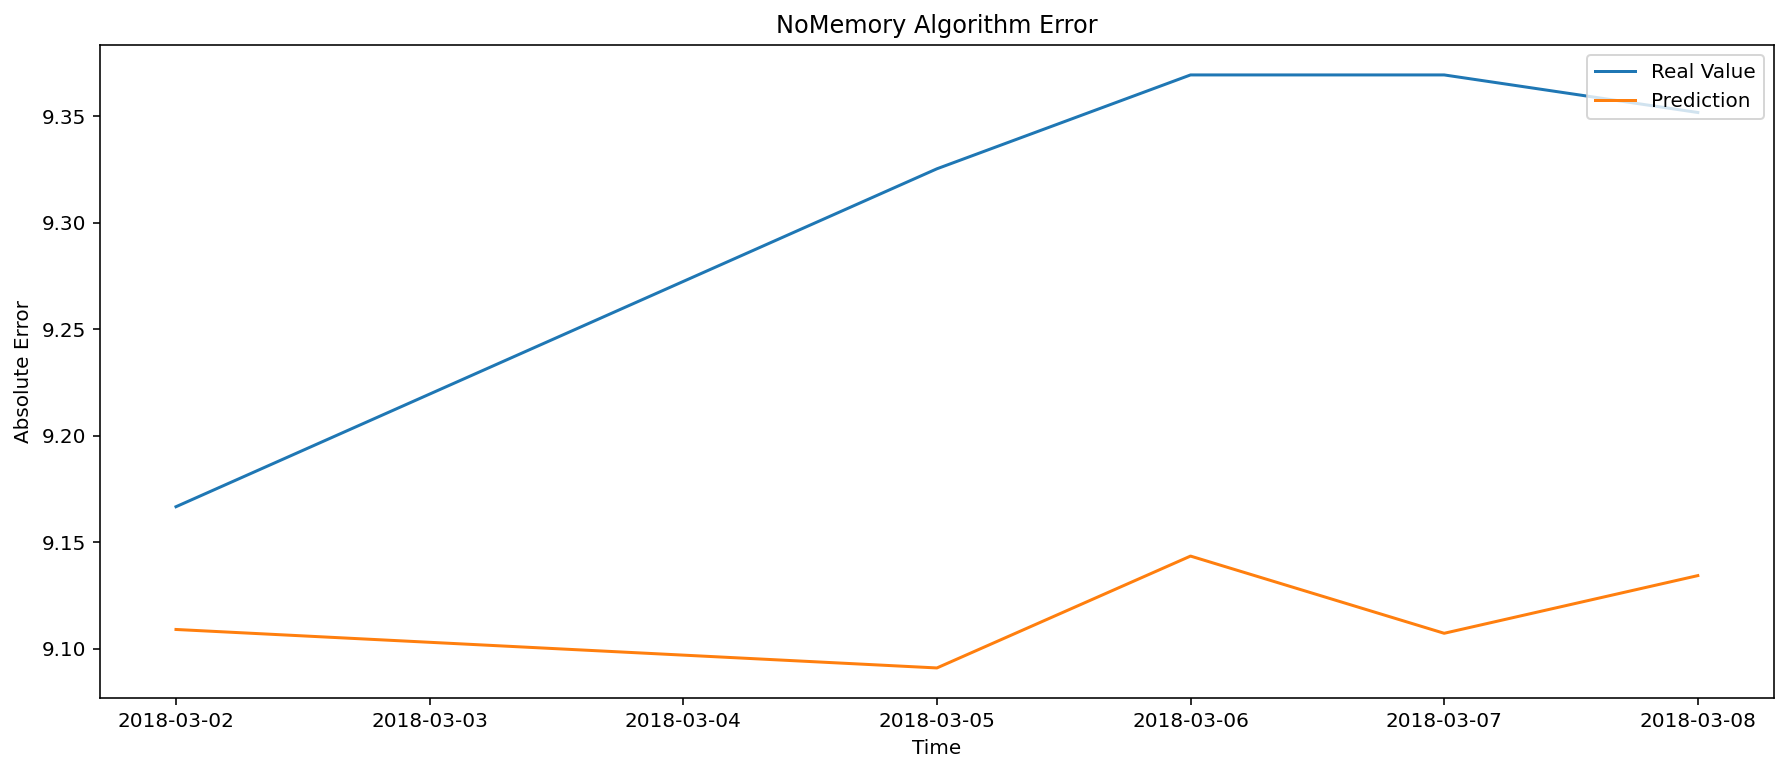

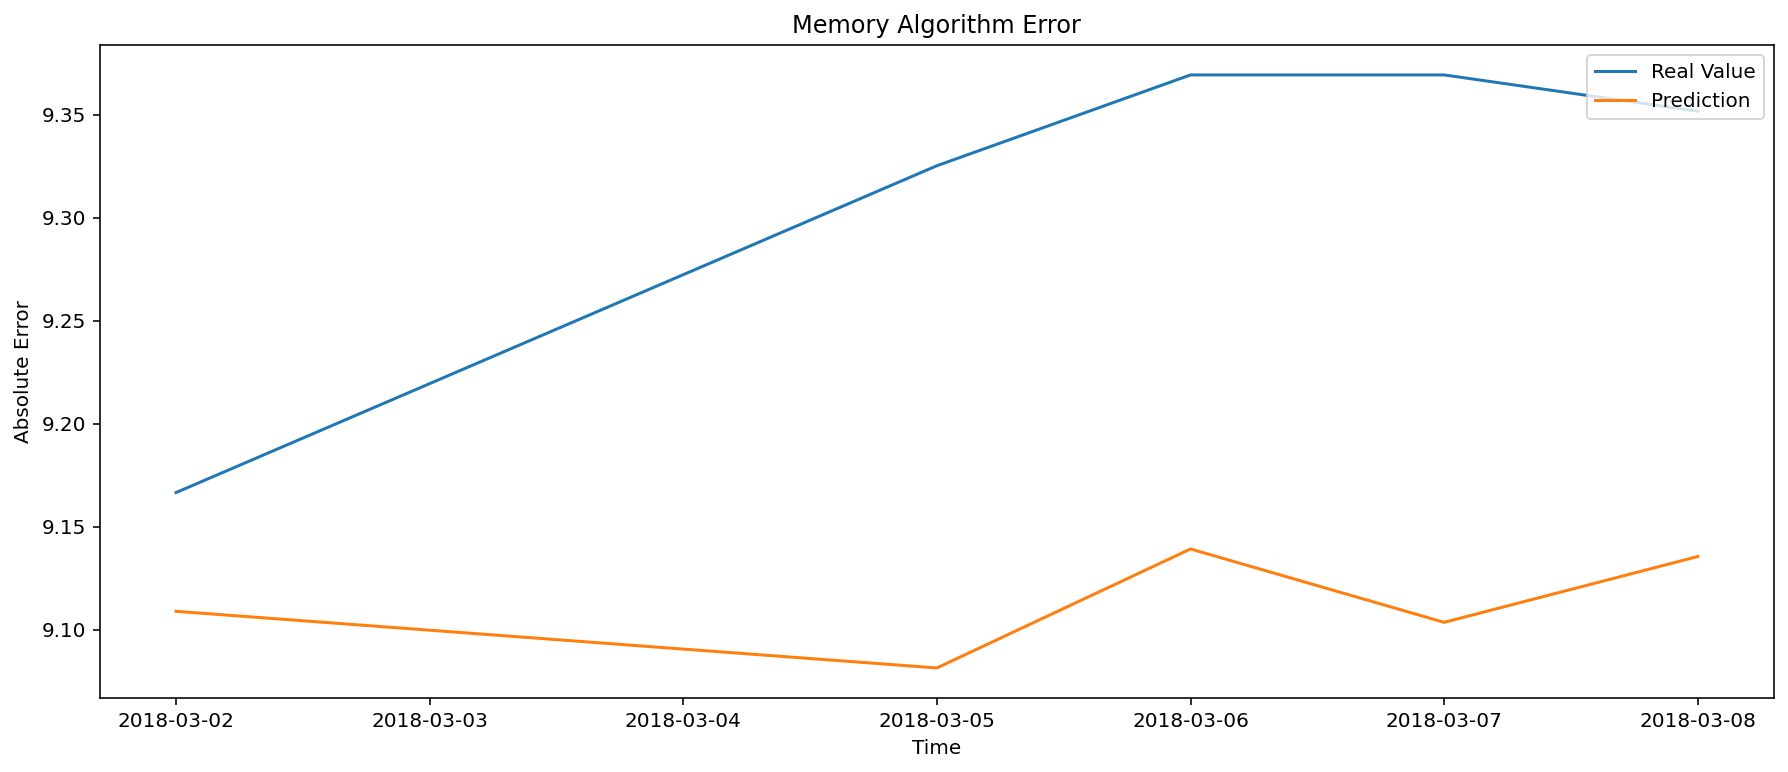

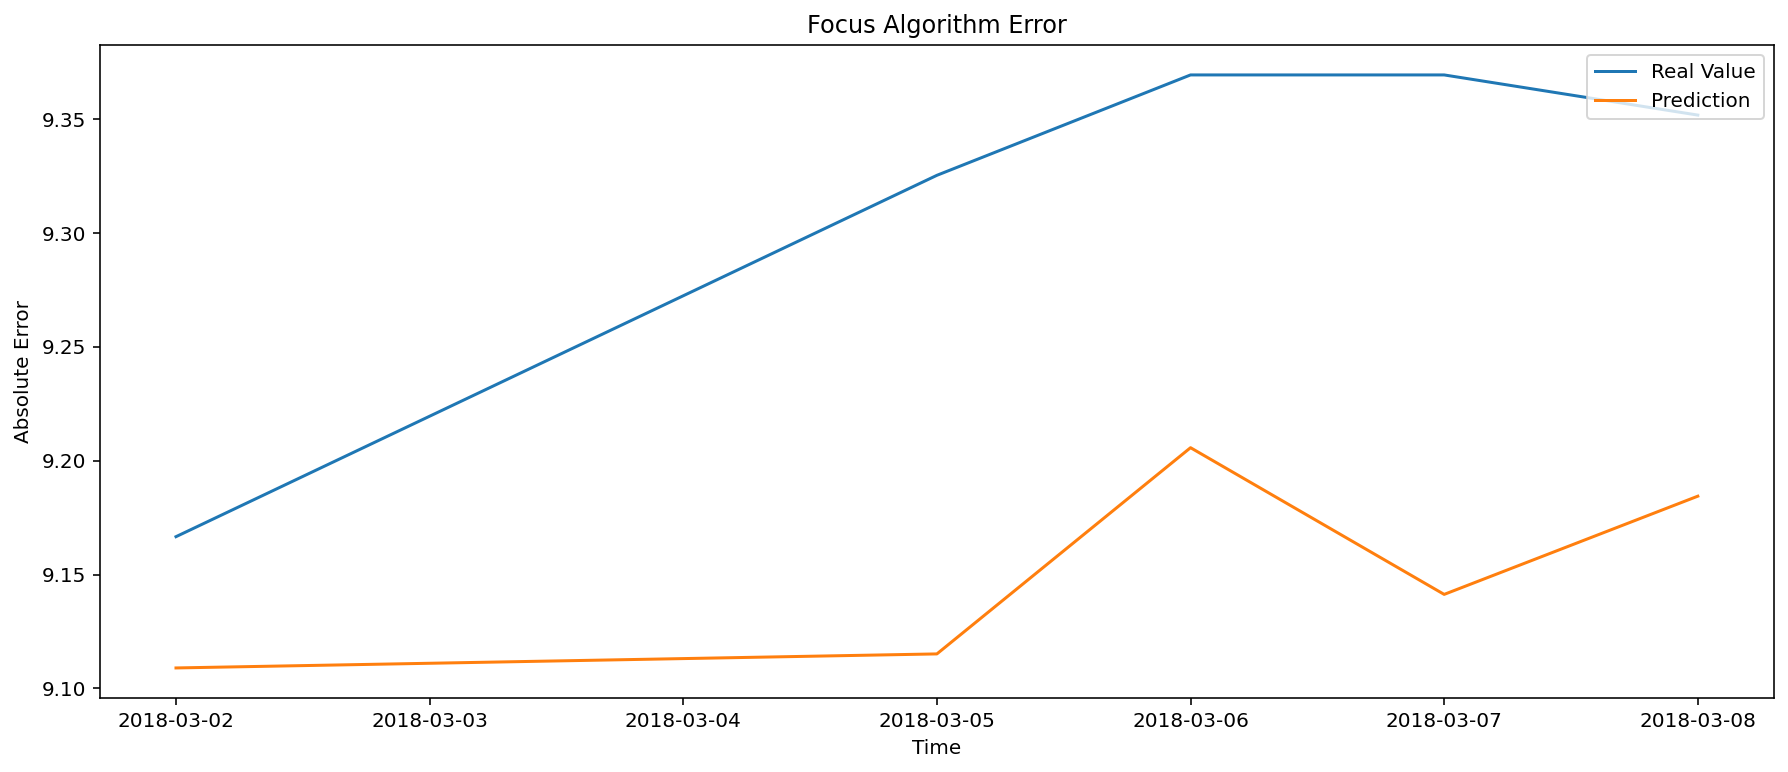

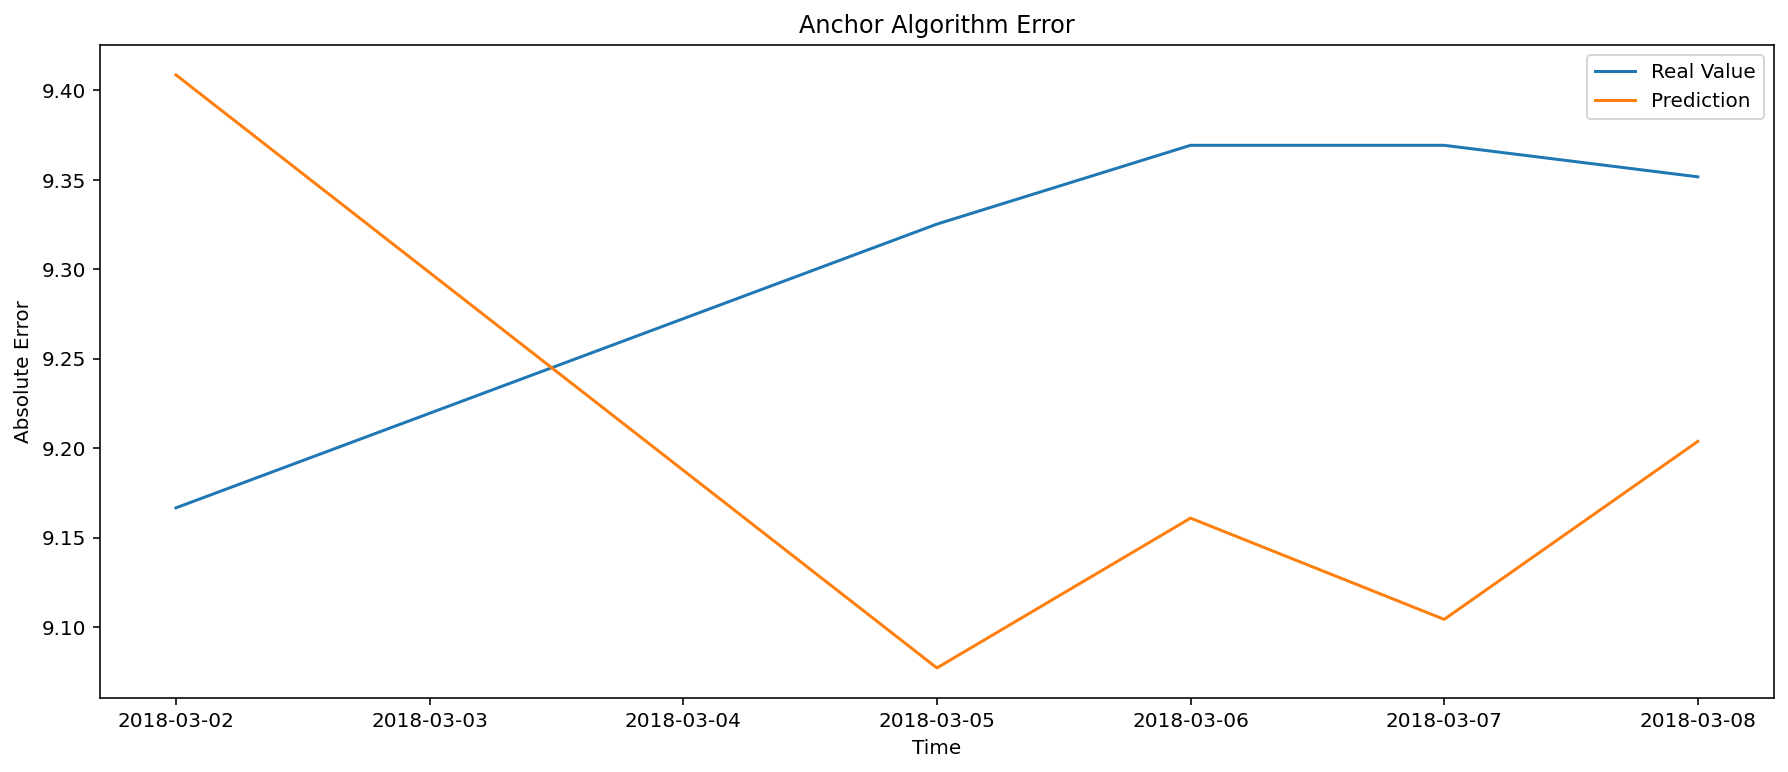

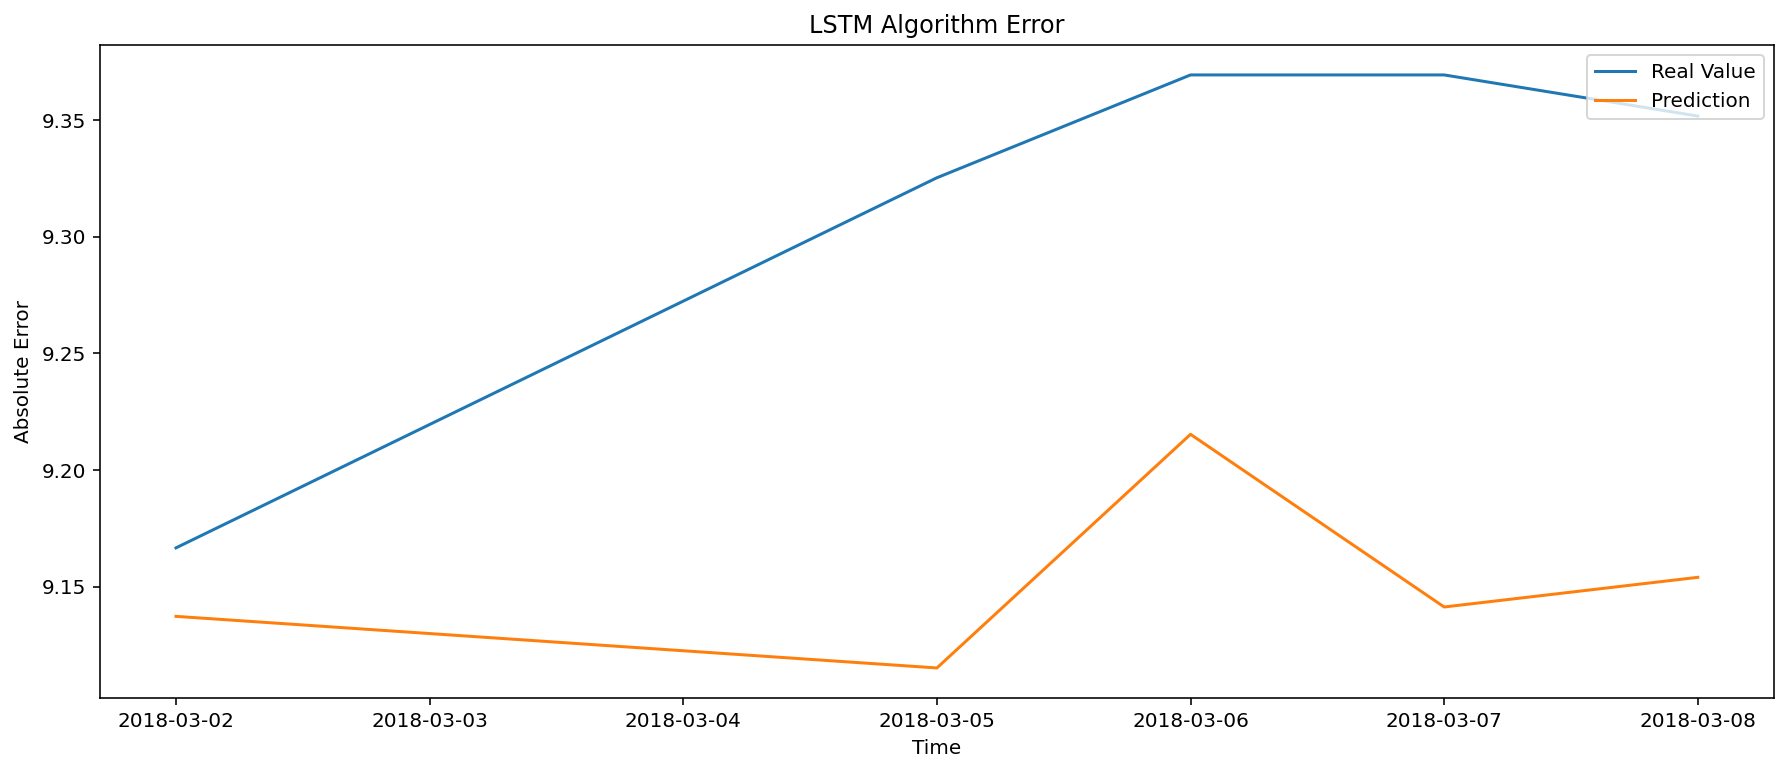

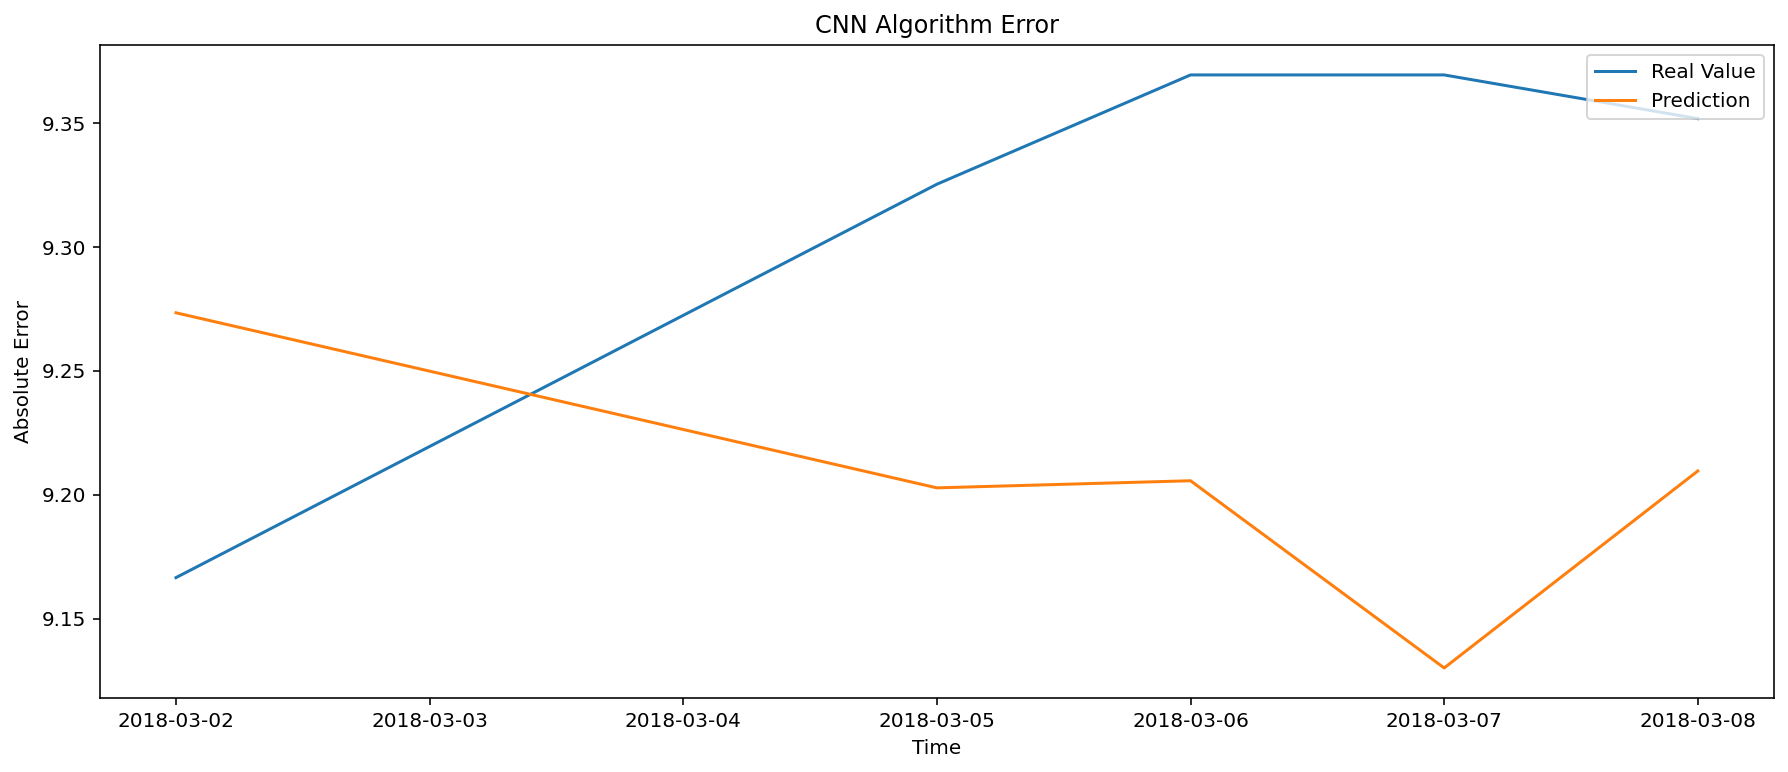

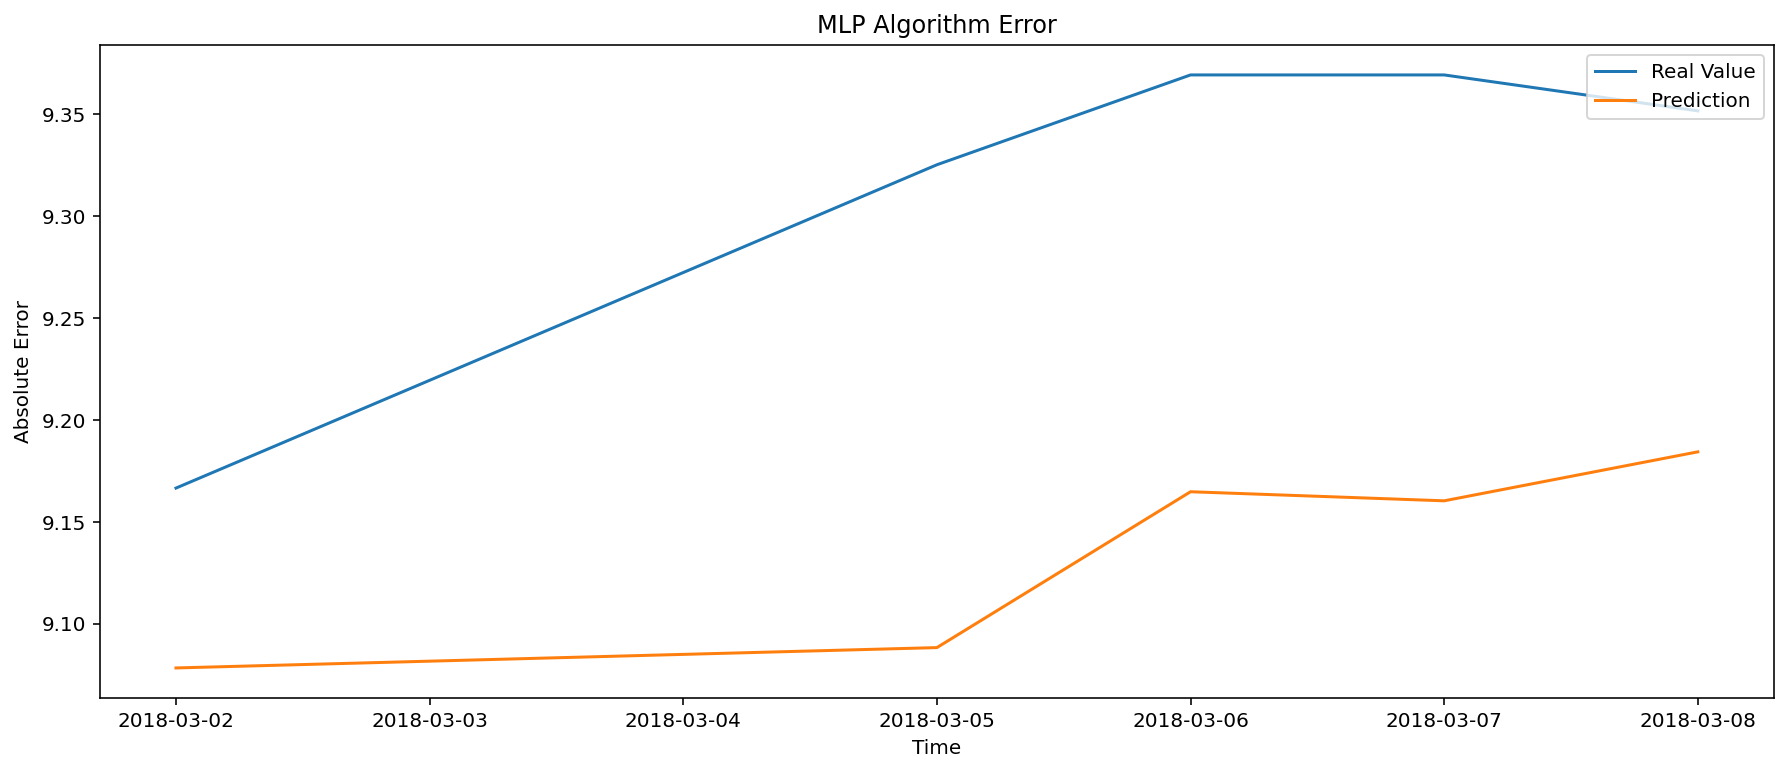

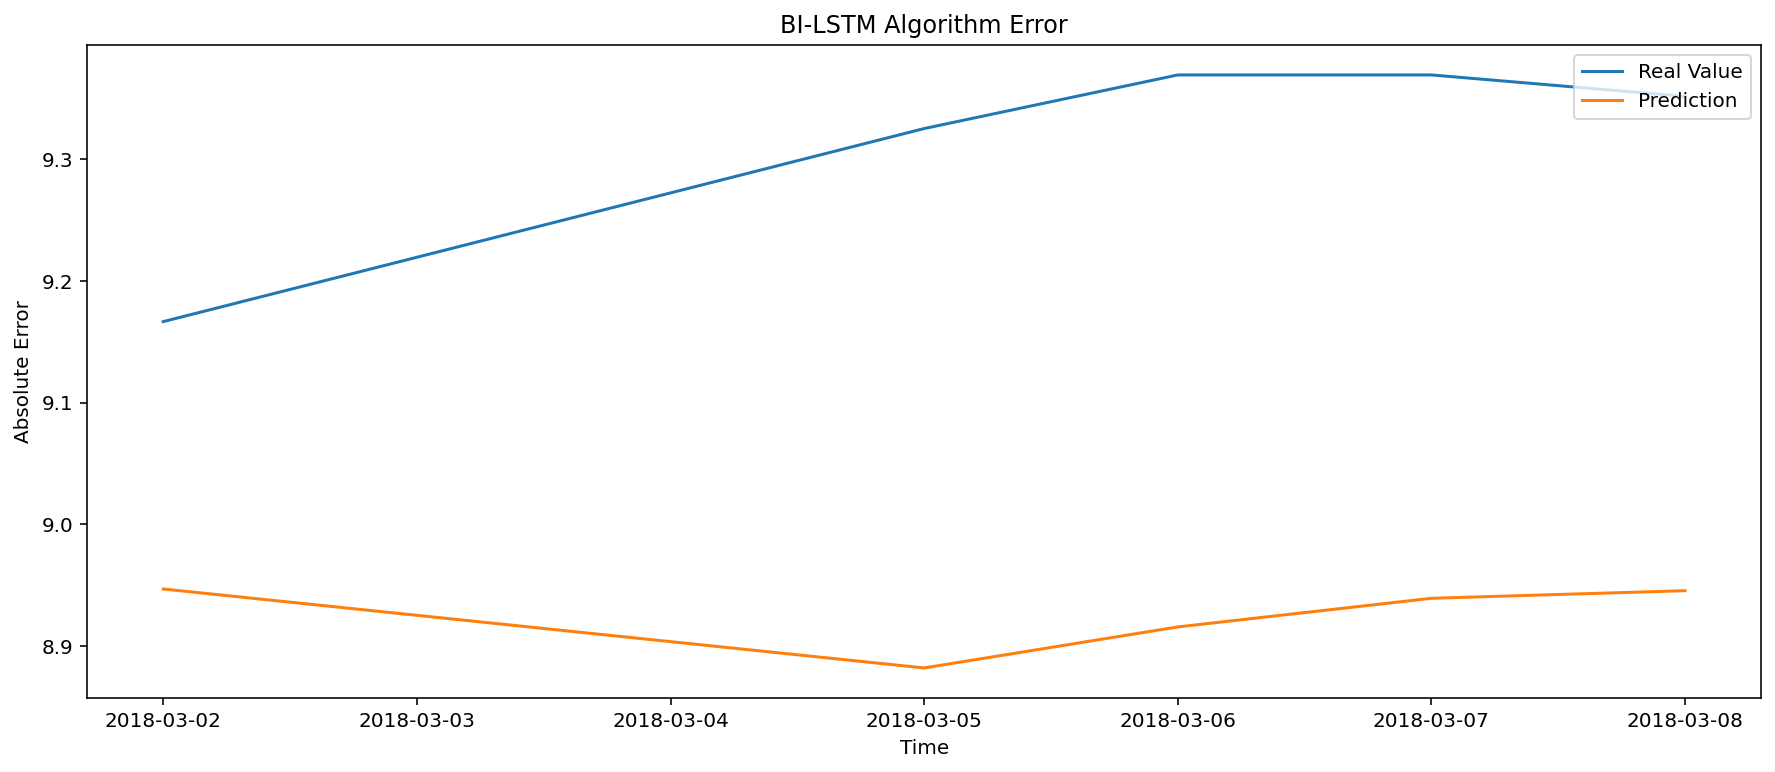

In [95]:
plot_performance(all_forecasts)